## (Additional Time budgets of 10 minutes and 20 minutes experiments 
### on 10 datasets of (361083, 361085, 361086, 361084, 361080, 361081, 361082, 361072, 361073, 361074) 
### with 10 random seeds (761, 193, 121, 101, 112, 168, 173, 194, 219, 683)

In [24]:
import pandas as pd
from glob import glob
pd.options.display.float_format = '{:,.6f}'.format

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (10,7)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10, forward=True)
fig.set_dpi(100)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams["figure.figsize"] = (20,10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10, forward=True)
plt.rcParams.update(params)

<Figure size 1500x1000 with 0 Axes>

In [26]:
def plot_diff(df, title='', score='Score', round_type="ceil"):
    raw=df.groupby(by=[5]).mean()[6]
    raw_std=df.groupby(by=[5]).std()[6]
    rev=df.groupby(by=[5]).mean()[7]
    rev_std=df.groupby(by=[5]).std()[7]
    fig, ax = plt.subplots()
    ax.plot(raw.index, raw.tolist(), color='red', label='baseline')
    plt.fill_between(raw.index, raw-raw_std, raw+raw_std, color='red', alpha=0.3)
    ax.plot(rev.index, rev.tolist(), color='blue', label='model_selector')
    plt.fill_between(rev.index, rev-rev_std, rev+rev_std, color='blue', alpha=0.3)
    plt.title(title, fontsize=20)
    plt.xlabel("Dataset Fraction", fontsize=16)
    plt.ylabel(score, fontsize=16)
    plt.legend()
    plt.grid()
    return plt

In [27]:
class Tex:
    def __init__(self, path):
        self.raw_df=pd.read_pickle(path)
        
        self.automls=['Baseline', 
                      'MLJAR',
                      'FLAML',
                      'AutoSKLearn', 
                      'H2O',  
                       'TPOT',
                      'AutoGluon',
                      'RSS']
        
        self.time_budgets=[600,
                           1200,
                          ]
        
        assert(self.check())
        
    def __str__(self):
        out='\n'
        for automl in self.automls:
            out+=f'{df[df.automl==automl].head(1).to_markdown()}\n'
        return out
    
    def check(self):
        df=self.raw_df
        for a in df.automl.unique():
            assert(a in self.automls)
        assert(len(df.automl.unique()==10))
        assert(len(df.project.unique())==10)
        assert(len(df.seed.unique())==10)
        assert(len(df.time_budget.unique()==2))
        return True
    
    def get_overall(self):
        df=self.raw_df.copy()
        temp_data={}
        for automl in self.automls:
            filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
            row=[]
            for i in filter_df.index:
                score=filter_df.loc[i].score['mean']
                std=filter_df.loc[i].score['std']
                row.append(f' {score.round(4)} $\pm$ {std.round(2)} ')
            temp_data[f'{automl}']=row
        out_df=pd.DataFrame.from_dict(temp_data)
        out_df.index=self.time_budgets
        tex= self._get_tex(out_df)
        return tex, out_df
    
    def _get_tex(self,df):
        return str(df.to_latex().replace('\$',
                                         '$').replace('\\textbackslash ',
                                                      '\\').replace('\{',
                                                                    '{').replace('\}',
                                                                                 '}'))
    
    def save_time_budget_figure(self):
        df=self.raw_df
        ax=None
        axs=[]
        for time_budget in reversed(sorted(df.time_budget.unique())):
            
            df_draw=df[(df.time_budget==time_budget)][['automl',
                                                       'project',
                                                       'score']].groupby(['project',
                                                                          'automl']).agg(['mean'])
            
            ax=df_draw.unstack().plot(ax=ax, rot=45, style=['r*-','b--','y^-', 
                                                            'g*--', 'y*:','r--',
                                                            'bo-','g:'], linewidth=2.0)
            ax.set_title(f'Time Budget:{time_budget}')
            ax.set_xlabel('Dataset')
            ax.set_ylabel('$R^2$')
            legends=[_[1] for _ in df_draw.index ]
            plt.legend(legends,fontsize=20)
            plt.grid(visible=True, which='major', color='0.75', linestyle='-')
            plt.savefig(f'fig_c_{time_budget}.jpg')
            plt.show()
            axs.append(ax)
            ax=None
        return axs  

In [28]:
input_path='10_dataset_10_seed_extra_time.pkl'
tex=Tex(input_path)
tex_code, tex_df = tex.get_overall()
df=tex.raw_df

/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this w

In [29]:
tex.raw_df.head(5)

,project,seed,time_budget,score,automl
0,361083,761,600,0.673084,Baseline
1,361083,761,1200,0.673084,Baseline
2,361083,193,600,0.677492,Baseline
3,361083,193,1200,0.677492,Baseline
4,361083,121,600,0.676069,Baseline


In [30]:
print(tex)


|    |   project |   seed |   time_budget |    score | automl   |
|---:|----------:|-------:|--------------:|---------:|:---------|
|  0 |    361083 |    761 |           600 | 0.673084 | Baseline |
|    |   project |   seed |   time_budget |    score | automl   |
|---:|----------:|-------:|--------------:|---------:|:---------|
|  1 |    361083 |    121 |           600 | 0.655516 | MLJAR    |
|    |   project |   seed |   time_budget |    score | automl   |
|---:|----------:|-------:|--------------:|---------:|:---------|
|  0 |    361083 |    121 |           600 | 0.673467 | FLAML    |
|    |   project |   seed |   time_budget |    score | automl      |
|---:|----------:|-------:|--------------:|---------:|:------------|
|  0 |    361083 |    121 |          1200 | 0.595532 | AutoSKLearn |
|    |   project |   seed |   time_budget |    score | automl   |
|---:|----------:|-------:|--------------:|---------:|:---------|
|  1 |    361083 |    121 |           600 | 0.649222 | H2O      |


In [31]:
print(tex_code)

\begin{tabular}{lllllllll}
\toprule
{} &             Baseline &                MLJAR &                FLAML &          AutoSKLearn &                  H2O &                 TPOT &            AutoGluon &                  RSS \\
\midrule
600  &   0.8888 $\pm$ 0.12  &   0.8865 $\pm$ 0.15  &   0.8996 $\pm$ 0.11  &   0.5553 $\pm$ 0.45  &    0.894 $\pm$ 0.12  &   0.8689 $\pm$ 0.16  &   0.8973 $\pm$ 0.12  &      0.9 $\pm$ 0.11  \\
1200 &   0.8888 $\pm$ 0.12  &   0.8866 $\pm$ 0.15  &   0.8999 $\pm$ 0.11  &   0.5577 $\pm$ 0.45  &   0.8956 $\pm$ 0.11  &   0.8737 $\pm$ 0.15  &   0.9021 $\pm$ 0.11  &   0.9012 $\pm$ 0.11  \\
\bottomrule
\end{tabular}



In [32]:
_, text_df = tex.get_overall()
text_df

/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  filter_df=df[df.automl==automl].groupby('time_budget').agg(['mean','std'])
/tmp/ipykernel_373277/3469618705.py:40: FutureWarning: ['automl'] did not aggregate successfully. If any error is raised this w

,Baseline,MLJAR,FLAML,AutoSKLearn,H2O,TPOT,AutoGluon,RSS
600,0.8888 $\pm$ 0.12,0.8865 $\pm$ 0.15,0.8996 $\pm$ 0.11,0.5553 $\pm$ 0.45,0.894 $\pm$ 0.12,0.8689 $\pm$ 0.16,0.8973 $\pm$ 0.12,0.9 $\pm$ 0.11
1200,0.8888 $\pm$ 0.12,0.8866 $\pm$ 0.15,0.8999 $\pm$ 0.11,0.5577 $\pm$ 0.45,0.8956 $\pm$ 0.11,0.8737 $\pm$ 0.15,0.9021 $\pm$ 0.11,0.9012 $\pm$ 0.11


In [38]:
print(tex_code)

\begin{tabular}{lllllllll}
\toprule
{} &             Baseline &                MLJAR &                FLAML &          AutoSKLearn &                  H2O &                 TPOT &            AutoGluon &                  RSS \\
\midrule
600  &   0.8888 $\pm$ 0.12  &   0.8865 $\pm$ 0.15  &   0.8996 $\pm$ 0.11  &   0.5553 $\pm$ 0.45  &    0.894 $\pm$ 0.12  &   0.8689 $\pm$ 0.16  &   0.8973 $\pm$ 0.12  &      0.9 $\pm$ 0.11  \\
1200 &   0.8888 $\pm$ 0.12  &   0.8866 $\pm$ 0.15  &   0.8999 $\pm$ 0.11  &   0.5577 $\pm$ 0.45  &   0.8956 $\pm$ 0.11  &   0.8737 $\pm$ 0.15  &   0.9021 $\pm$ 0.11  &   0.9012 $\pm$ 0.11  \\
\bottomrule
\end{tabular}



In [33]:
text_df.to_markdown()

'|      | Baseline          | MLJAR             | FLAML             | AutoSKLearn       | H2O               | TPOT              | AutoGluon         | RSS               |\n|-----:|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|\n|  600 | 0.8888 $\\pm$ 0.12 | 0.8865 $\\pm$ 0.15 | 0.8996 $\\pm$ 0.11 | 0.5553 $\\pm$ 0.45 | 0.894 $\\pm$ 0.12  | 0.8689 $\\pm$ 0.16 | 0.8973 $\\pm$ 0.12 | 0.9 $\\pm$ 0.11    |\n| 1200 | 0.8888 $\\pm$ 0.12 | 0.8866 $\\pm$ 0.15 | 0.8999 $\\pm$ 0.11 | 0.5577 $\\pm$ 0.45 | 0.8956 $\\pm$ 0.11 | 0.8737 $\\pm$ 0.15 | 0.9021 $\\pm$ 0.11 | 0.9012 $\\pm$ 0.11 |'

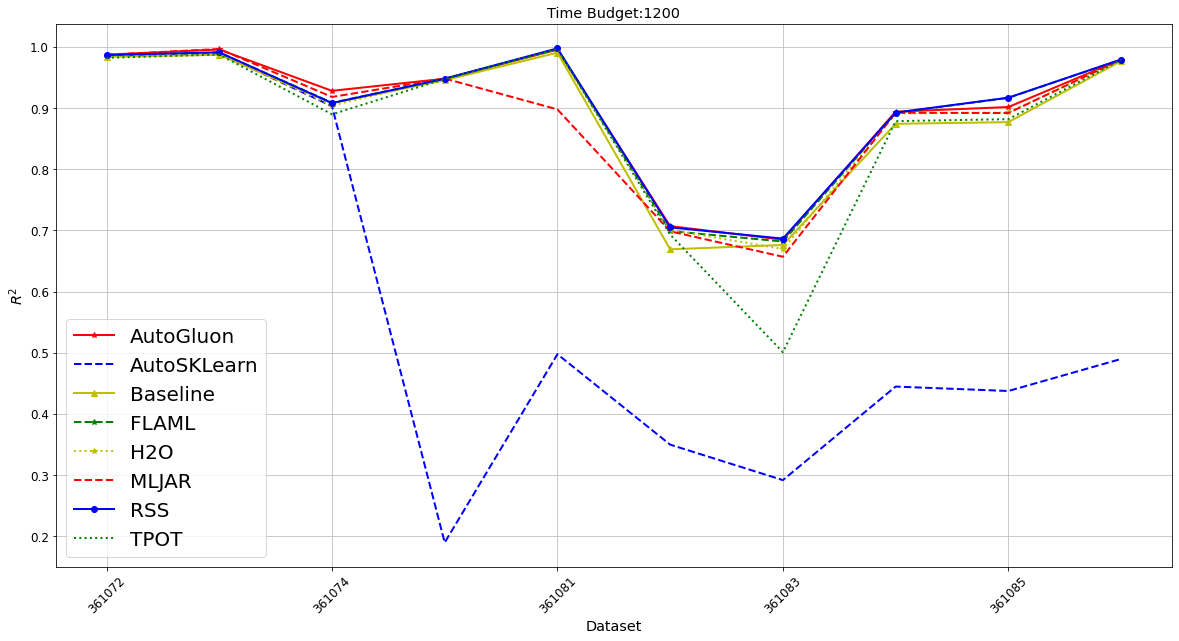

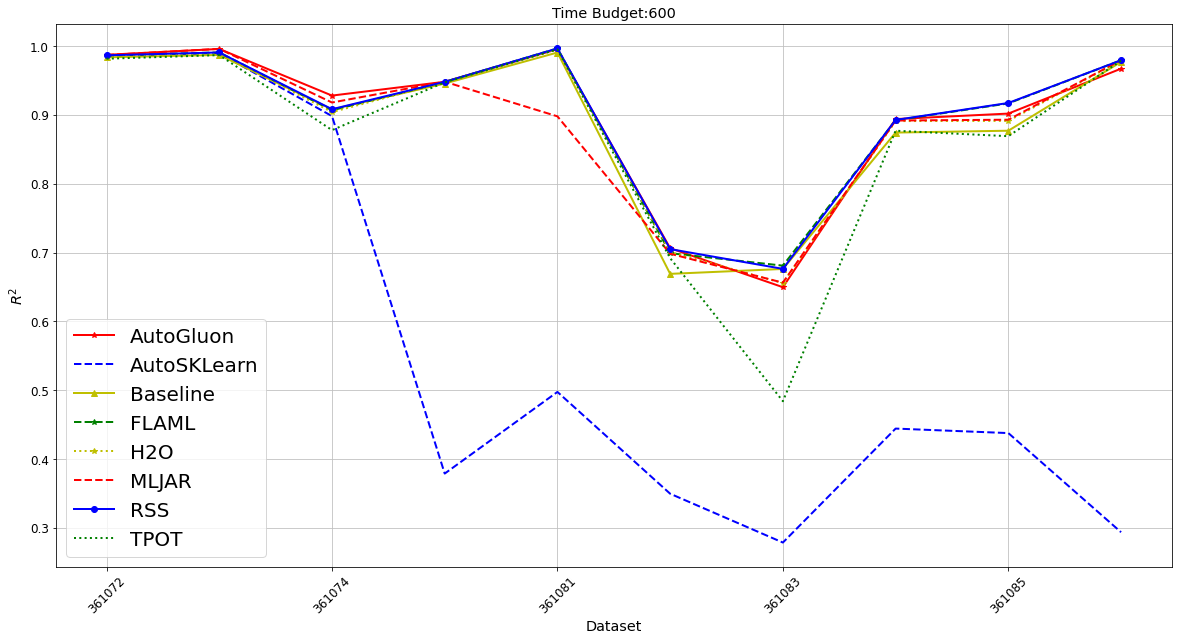

[<AxesSubplot:title={'center':'Time Budget:1200'}, xlabel='Dataset', ylabel='$R^2$'>,
 <AxesSubplot:title={'center':'Time Budget:600'}, xlabel='Dataset', ylabel='$R^2$'>]

In [34]:

tex.save_time_budget_figure()

In [35]:
#list of datasets
tex.raw_df.project.unique()

array(['361083', '361085', '361086', '361084', '361080', '361081',
       '361082', '361072', '361073', '361074'], dtype=object)

In [36]:
#list of seeds
tex.raw_df.seed.unique()

array([761, 193, 121, 101, 112, 168, 173, 194, 219, 683])